In [38]:
import json
import pandas as pd
import numpy as np
import ast
from keras.datasets import cifar10
from scipy import signal
from scipy.ndimage import imread

from matplotlib import pyplot as plt 
%matplotlib inline

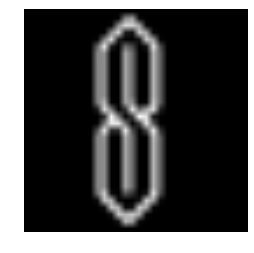

In [147]:
S = imread("U9IsW.jpg", flatten=True)
S.astype("float64")
S = scipy.misc.imresize(S, (32, 32))

#S /= 255.0
plt.axis('off')
plt.imshow(S, cmap ="Greys")


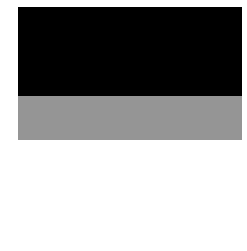

In [164]:
vertical = np.array([[-1, -1, 0, 1,  1], 
                     [-1, -1, 0, 1,  1], 
                     [-1, -1, 0, 1,  1],
                    [-1, -1, 0, 1,  1],
                    [-1, -1, 0, 1,  1]])

horizontal = np.rot90(vertical)

diagonal1 = np.array([[-1, -1, -1, -1, 0], 
                     [-1, -1, -1, 0, 1], 
                     [-1, -1, 0, 1, 1],
                     [-1, 0, 1, 1, 1],
                     [0, 1, 1, 1, 1]])

diagonal2 = np.rot90(diagonal1)

plt.axis('off')
plt.imshow(horizontal, interpolation="nearest", cmap = "Greys")

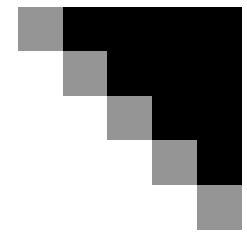

In [171]:
plt.axis("off")
plt.imshow(diagonal2, interpolation="nearest", cmap = "Greys")

(32, 32)
(5, 5)


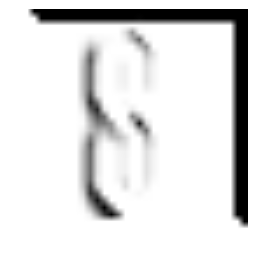

In [170]:
filt = np.array([[1 ,-1]])

print S.shape
print vertical.shape
fmap_vert = signal.convolve2d(S, vertical, mode = "same")
fmap_hor = signal.convolve2d(S, horizonal, mode = "same")
fmap_diag1 = signal.convolve2d(S, diagonal1, mode = "same")
fmap_diag2 = signal.convolve2d(S, diagonal2, mode = "same")

plt.axis("off")
plt.imshow(fmap_diag2, cmap = "Greys", vmin = 30, vmax =500)



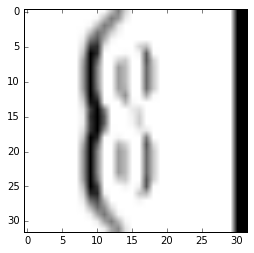

In [158]:
plt.imshow(np.maximum(fmap_vert, 0), cmap = "Greys", vmin = 30, vmax =500)

In [222]:
h_indices = range(0,32,2)
v_indices = range(0,32,2)

np.array([[1, 2], [1,2]])[:, 0]

array([1, 1])

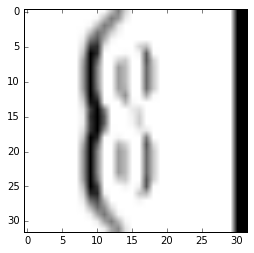

In [237]:
plt.imshow(np.maximum(fmap_vert, 0), cmap = "Greys", vmin = 30, vmax = 500)

In [ ]:
def maxdownsample2d(data, factor):
         """Supply a 2D numpy array, and an integer factor by which to
 downsample (by nonoverlapping maxpooling) in both directions"""
        # factor might not be exact fit, so we trim to this.
        trimrows = int(np.floor(data.shape[0] / float(factor))) * factor
        trimcols = int(np.floor(data.shape[1] / float(factor))) * factor
        first = True
        for coff in range(factor):
            for roff in range(factor):
                hopped = data[roff:trimrows:factor, coff:trimcols:factor]
                    if first:
                         maxsofar = hopped
                                 first = False
             else:
                                 maxsofar = np.maximum(maxsofar, hopped)
         return maxsofar

In [261]:
def maxpool(array, stride):
    """
    Maxpooling operation
    Assumes kernel size is square and the same size as stride
    """
    hpad = array.shape[0] % stride
    vpad = array.shape[1] % stride
    padded_array = array
    side = "L"
    for column in range(hpad):
        if side == "L":
            padded_array = np.hstack((np.zeros((padded_array.shape[0], 1)), padded_array))
            side = "R"
        elif side == "R":
            padded_array = np.hstack((padded_array, np.zeros((padded_array.shape[0], 1))))
    side = "T"
    for column in range(vpad):
        if side == "T":
            padded_array = np.vstack((np.zeros((1,padded_array.shape[1])), padded_array))
            side = "B"
        elif side == "B":
            padded_array = np.vstack((padded_array, np.zeros((1,padded_array.shape[1]))))
    
    h = padded_array[0] / stride
    w = padded_array[1] / stride
    
    first = True
    for i in range(stride):
        for z in range(stride):
            shifted = padded_array[i:padded_array.shape[0]:2, z:padded_array.shape[1]:2]
            if first:
                maxsofar = shifted
                first = False
            else:
                maxsofar = np.maximum(maxsofar, shifted)
    return maxsofar

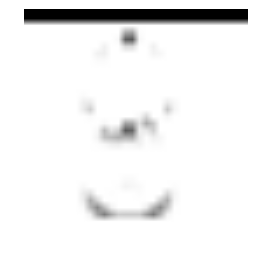

In [166]:
plt.axis("off")
plt.imshow(np.maximum(fmap_hor, 0), cmap = "Greys", vmin = 30, vmax =500)

2550


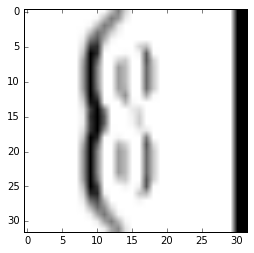

In [264]:
fmap_vert_pool = maxpool(np.maximum(fmap_vert, 0), 2)

plt.imshow(np.maximum(fmap_vert, 0), cmap = "Greys", vmin = 30, vmax = 500)
print np.max(fmap_vert_pool)

(16, 16)


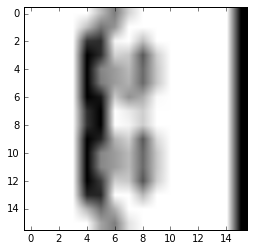

In [265]:
print fmap_vert_pool.shape
plt.imshow(fmap_vert_pool, cmap = "Greys", vmin = 30, vmax = 500)

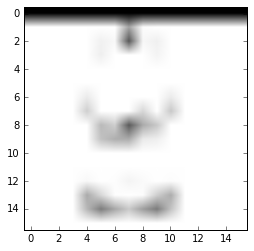

In [266]:
fmap_vert_pool = maxpool(np.maximum(fmap_hor, 0), 2)
plt.imshow(fmap_vert_pool, cmap = "Greys", vmin = 30, vmax = 500)

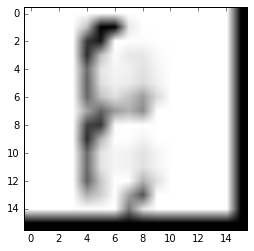

In [269]:
fmap_vert_pool = maxpool(np.maximum(fmap_diag1, 0), 2)
plt.imshow(fmap_vert_pool, cmap = "Greys", vmin = 30, vmax = 500)